# Getting Text from .csv files

In [1]:
import csv
labels = []
sentences = []
from bs4 import BeautifulSoup
import string
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))

In [2]:
with open('twitter_sentiment_data.csv', encoding="utf8") as csvfile:
    tweet_reader = csv.reader(csvfile, delimiter = ',')
    for row in tweet_reader:
        #print(row[0])
        #print(','.join(row))
        labels.append(row[0])
        #print(labels)
        sentence = row[1].lower()
        sentence = sentence.replace(",", " , ")     ## "his/her", "he.is", "try-me" - can be treated as a single word
        sentence = sentence.replace(".", " . ")     ## To convert them to " his / her "
        sentence = sentence.replace("-", " - ")
        sentence = sentence.replace("/", " / ")
        soup = BeautifulSoup(sentence)
        sentence = soup.get_text()
        table = str.maketrans('' , '', string.punctuation)
        words = sentence.split()
        filtered_sentence = ""
        for word in words:
            word = word.translate(table)
            if word not in stop_words:
                filtered_sentence = filtered_sentence + word + " "
        sentences.append(filtered_sentence)

In [3]:
len(sentences), len(labels)

(101, 101)

In [4]:
sentences

['text ',
 'rt sklausdev path data science  important technological educational aspects data science leofmrocha tdatascience d… ',
 'rt gfitaliano new program data science management uniluiss designed talents want lead businesses digi… ',
 'path data science  important technological educational aspects data science leofmrocha in… https    co  kzimeopwb1 ',
 'new program data science management uniluiss designed talents want lead businesses into… https    co  vuoaj61jyd ',
 'regression  classification machine learning r n4  5 hours  1492 students  february 2021 release nn🆓 lin… https    co  h3vypa7lns ',
 'highly numerate education maths  science interested working ethical business ar… https    co  kwxuyedewk ',
 'hiring data science manager  remote working uk  remote  united kingdom  https    co  3fr3osisq1 ai… https    co  1rxhsnh0bi ',
 'rt agimafr 🇬🇧 ultimate python bootcamp data science  machine learningn🔗https    co  plfwaklaaanfree 59 hoursnfree education d… ',
 'doilum put nhs r

# Now .... Generate Train and Test Samples....

In [7]:
training_size = 70
train_sentences = sentences[0:training_size]
test_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
test_labels = labels[training_size:]
#print(train_sentences)
len(train_sentences)

70

# Create word Index from sentences and use tokenizer

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
vocab_size = 10000
max_len = 10
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padding = pad_sequences(train_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type)

In [9]:
train_sequences

[[160],
 [3, 161, 60, 2, 4, 24, 61, 62, 63, 2, 4, 64, 40, 65],
 [3, 162, 41, 66, 2, 4, 67, 68, 69, 70, 42, 43, 71, 163],
 [60, 2, 4, 24, 61, 62, 63, 2, 4, 64, 13, 6, 5, 164],
 [41, 66, 2, 4, 67, 68, 69, 70, 42, 43, 71, 165, 6, 5, 166],
 [167,
  168,
  8,
  7,
  10,
  169,
  170,
  171,
  172,
  173,
  174,
  14,
  175,
  176,
  177,
  6,
  5,
  178],
 [179, 180, 44, 181, 4, 182, 72, 183, 184, 185, 6, 5, 186],
 [73, 2, 4, 187, 74, 72, 188, 74, 189, 190, 6, 5, 191, 192, 6, 5, 193],
 [3, 194, 195, 196, 9, 75, 2, 4, 8, 197, 5, 198, 199, 200, 44, 65],
 [201, 202, 203, 76, 77, 78, 2, 79, 4, 204, 76, 205, 15, 6, 5, 206],
 [3, 45, 25, 46, 47, 48, 11, 49, 50, 11, 4, 51, 52, 15],
 [207, 2, 4, 208, 209],
 [3, 26, 16, 17, 7, 18, 19, 9, 10, 2, 20, 21, 8, 7, 27, 13],
 [3, 210, 80, 2, 211, 212, 213, 214, 215, 216, 217, 218, 24, 4, 2, 219, 220],
 [22,
  221,
  53,
  222,
  2,
  4,
  223,
  53,
  224,
  225,
  226,
  227,
  228,
  229,
  53,
  230,
  231,
  6,
  5,
  232],
 [3, 26, 16, 17, 7, 18, 19, 9

In [10]:
print(train_padding)
train_padding.shape

[[160   0   0   0   0   0   0   0   0   0]
 [  3 161  60   2   4  24  61  62  63   2]
 [  3 162  41  66   2   4  67  68  69  70]
 [ 60   2   4  24  61  62  63   2   4  64]
 [ 41  66   2   4  67  68  69  70  42  43]
 [167 168   8   7  10 169 170 171 172 173]
 [179 180  44 181   4 182  72 183 184 185]
 [ 73   2   4 187  74  72 188  74 189 190]
 [  3 194 195 196   9  75   2   4   8 197]
 [201 202 203  76  77  78   2  79   4 204]
 [  3  45  25  46  47  48  11  49  50  11]
 [207   2   4 208 209   0   0   0   0   0]
 [  3  26  16  17   7  18  19   9  10   2]
 [  3 210  80   2 211 212 213 214 215 216]
 [ 22 221  53 222   2   4 223  53 224 225]
 [  3  26  16  17   7  18  19   9  10   2]
 [233   2   4  75 234 235 236 237 238   5]
 [  3  26  16  17   7  18  19   9  10   2]
 [  3  40  81  82  83   2   4  84  54  85]
 [ 16  17   7  18  19   9  10   2  20  21]
 [  3  45  25  46  47  48  11  49  50  11]
 [  3 243 244 245 246 247   2 248 249 250]
 [254  87 255  12 256 257  87 258  12  55]
 [267  88  

(70, 10)

# How to Read Text from JSON files. . . . . . . . .Most widely used file format in the modern world.

## JavaScript Object Notation (JSON) is a standardized format commonly used to transfer data as text that can be sent over a network. It's used by lots of APIs and Databases, and it's easy for both humans and machines to read. JSON represents objects as name/value pairs, just like a Python dictionary

https://www.kaggle.com/rmisra/news-headlines-dataset-for-sarcasm-detection

#    {"firstName" : "PVV",
#     "LastName" : "Kishore"}   -- - - -> JSON Object

# JSON Support Arrays and Contain Arrays

##    [ 
##       {"firstName" : "PVV",
##        "LastName" : "Kishore"},
##       {"firstName" : "P",
##        "LastName" : "Manya"}
##       {"firstName" : "PVV",
##        "LastName" : "Kishore"
##         "emails" : ["pvvkishore@klu.in", "directorystp_1@gmail.com"]
##        }
##          ]


# Read.JSON File Format

In [11]:
import json
#with open('Sarcasm_Headlines_Dataset.json', 'r') as f:
    #datastore = json.load(f)

In [12]:
tweets = []
for line in open('Sarcasm_Headlines_Dataset.json', 'r'):
    tweets.append(json.loads(line))
    #for item in tweets:
        #sentence = item['headline'].lower()
        #label = item['is_sarcastic']
        #lin = item['article_link']

In [13]:
sentence

'rt @agimafr: 🇬🇧 ultimate python bootcamp for data science & machine learning\\n🔗https: /  / t . co / plfwaklaaa\\nfree for 59 hours\\n#free #education #d…'

In [14]:
sentences = []
labels = []
urls = []
for item in tweets:
    sentence = item['headline'].lower()
    sentence = sentence.replace(",", " , ")
    sentence = sentence.replace(".", " . ")
    sentence = sentence.replace("-", " - ")
    sentence = sentence.replace("/", " / ")
    soup = BeautifulSoup(sentence)
    sentence = soup.get_text()
    words = sentence.split()
    table = str.maketrans(' ' , ' ', string.punctuation)
    filtered_sentence = " "
    for word in words:
        word = word.translate(table)
        if word not in stop_words:
            filtered_sentence = filtered_sentence + word + " "
    sentences.append(filtered_sentence)
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [15]:
labels

[0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,


In [16]:
training_size = 20000
train_sentences = sentences[0:training_size]
test_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
test_labels = labels[training_size:]
#print(train_sentences)
len(train_sentences)

20000

In [17]:
len(test_sentences), 20000/26709*100

(6709, 74.88112621213823)

In [18]:
vocab_size = 10000
max_len = 10
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padding = pad_sequences(train_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type)

In [19]:
val_padding = train_padding[15000:]
val_labels = training_labels[15000:]
train_padding = train_padding[:15000]
training_labels = training_labels[:15000]

In [20]:
print(word_index)

{'<OOV>': 1, 'new': 2, 'trump': 3, 'man': 4, 'one': 5, 'year': 6, 'report': 7, 'area': 8, 'u': 9, 'donald': 10, 'day': 11, 'says': 12, 'woman': 13, 'time': 14, 'first': 15, 'get': 16, 'like': 17, 'old': 18, 'trumps': 19, 'life': 20, 'people': 21, 'obama': 22, 'women': 23, 'house': 24, 'white': 25, 'back': 26, 'make': 27, 'still': 28, 'clinton': 29, 'world': 30, '5': 31, 'americans': 32, 'could': 33, 'way': 34, 'years': 35, 'black': 36, 'family': 37, 'study': 38, 'best': 39, 'gop': 40, 'show': 41, 'bill': 42, 'school': 43, 'president': 44, 'police': 45, '3': 46, 'would': 47, 'know': 48, 'american': 49, 'last': 50, 'watch': 51, 'good': 52, 'cant': 53, 'really': 54, 'going': 55, '10': 56, 'video': 57, 'death': 58, 'things': 59, 'hillary': 60, 'love': 61, 'finds': 62, 'home': 63, 'state': 64, 'nation': 65, 'may': 66, 'say': 67, 'need': 68, 'health': 69, 'right': 70, 'work': 71, 'take': 72, '2': 73, 'every': 74, '000': 75, 'dead': 76, 'little': 77, 'parents': 78, 'gets': 79, 'mom': 80, 'cam

In [21]:
tokenizer.fit_on_texts(test_sentences)
word_index = tokenizer.word_index
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padding = pad_sequences(test_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type)

# Making Sentiment Programmable Using Embeddings

# How to Establish Meaning to the words or a ssentence
# This is established using EMBEDDINGS : which creates a high demensional space for representing words. 

## The direction of these vectors can be learned over time based on the words in the corpus.

### Given a sentence, you can investigate the directions of word vectors, sum them up and from the overall direction if the summarization establish the sentiment of the sentence as a product of its words.


# How meaning can be derived from numerics.

## Positive --> Sarcastic = '1'
## christian bale given 

### Lets assume, all words start with a value of '0'. we could add '1' to each of the words.


# {"christian":1, "bale":1, "given":1, "neutered":1,  "male":1,  "statuette":1, "named":1, "oscar":1.}

## Negative ---> Sarcastic = '0'
## 3 lessons for america from christian bale's moses

### Subtract '1' from the current value of each word and it looks like this...

# {"christian":0, "bale":0, "given":1, "neutered":1,  "male":1,  "statuette":1, "named":1, "oscar":1, "lessons":-1, "america":-1, "moses":-1,"3":-1}

#### "christian":0, "bale":0, got offseted by non sarcastic words. 
# Repeat this process 1000's of times and we end up with a huge list of words from the corpus scored based on usage.

# Establish the sentiment of the following sentence.. .   ... .
## neutered male statuette wins 3 america oscar
##     1            1          1           0     -1     -1          1
### ADD = 2..... Guess the Output

# Let's Explore "Embeddings in Tensorflow"

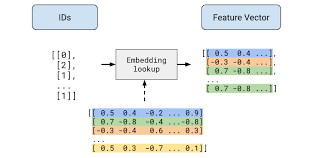

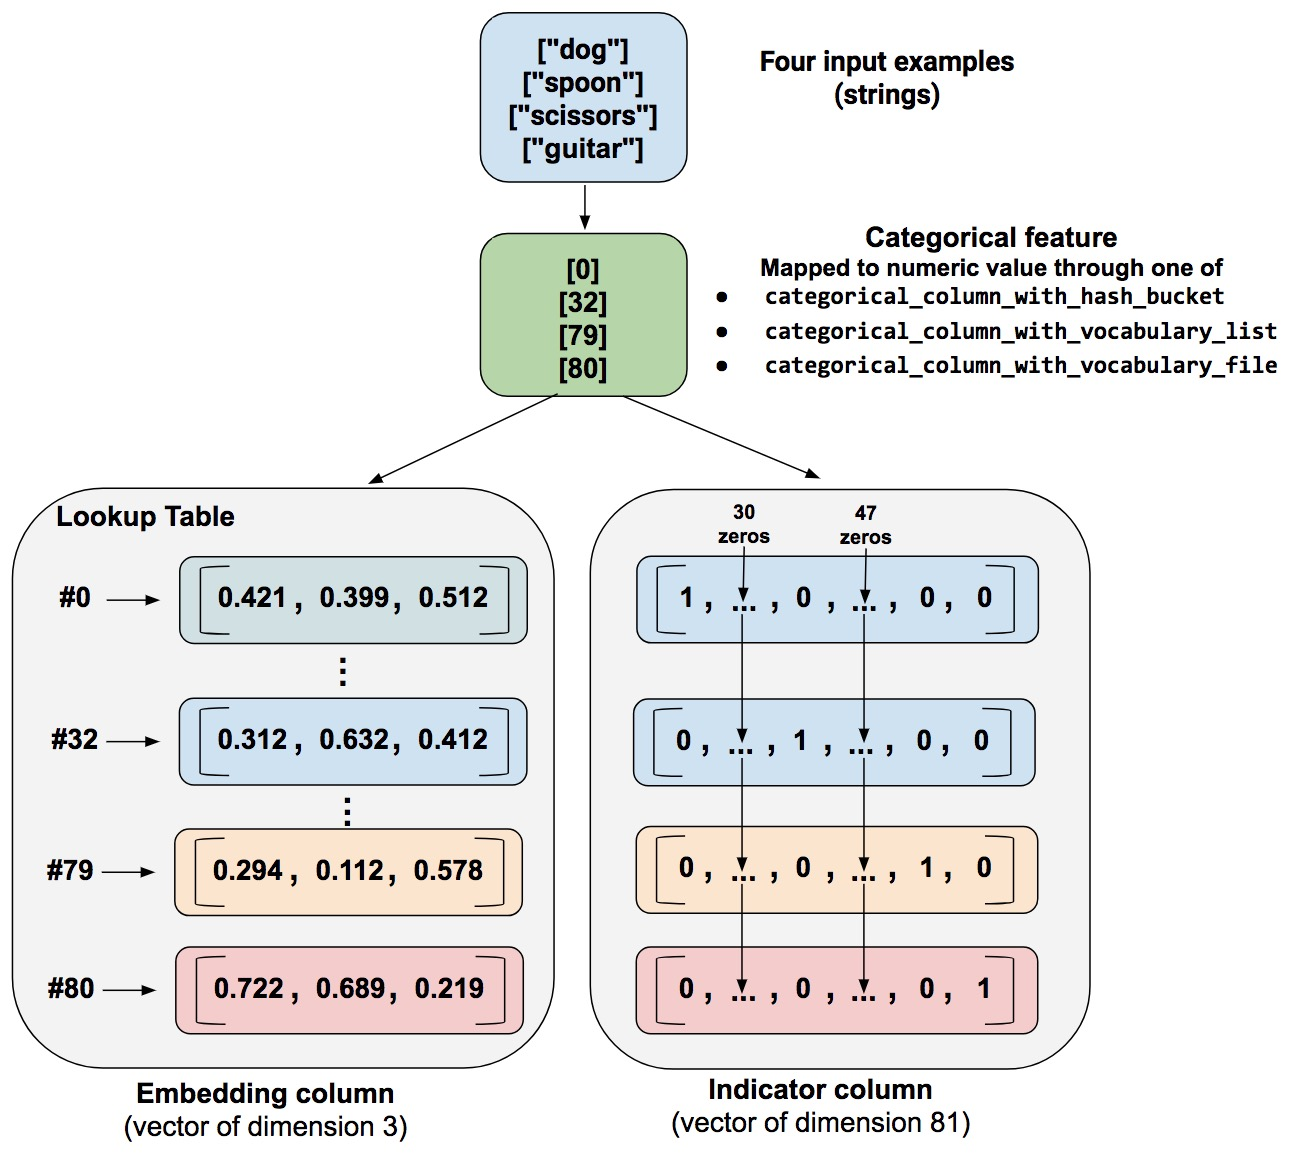

# Use Embeddings as a Layer in tf.keras.layers
### This creates a LOOK UP Table for mapping an integer to an embedding table consistings of vectors representing the word pointed by the integer. 

# Let's build a sarcasam detector........... . . ........... . . . . .... ... 

In [ ]:
import numpy as np
train_padded = np.array(train_padding)
test_padded = np.array(test_padding)
train_labels = np.array(training_labels)
test_labels = np.array(test_labels)
val_padding = np.array(val_padding)
val_labels = np.array(val_labels)

# Initialization of Embedding Layer


# SYNTAX
tf.keras.layers.Embeddings(vocab_size, embedding_dim)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
model.summary()

### Vocabulary Size = 10000 with an embedding dimension of 16. Means that each word will have a vector size of 16. Hence the total number of trainable parameters is 160K.

### Averaging pooling dosen't have any trainable parameters....bcz its just averaging on the all the vocabulary.... to get a 16 value vector.

### 24 neuron dense layer. input is a 16 value averaged vector. Hence 16X24 + 16 (biases) = 408 trainable parameters.

### The output is 24 weights + 1 bias = 25 trainable parameters.

In [ ]:
tf.keras.utils.plot_model(model, show_shapes = True)

# Since the vocab_size = 10000, that will be enoded into a higher dimension of 16, we have 160K trainable Parameters

In [ ]:
history = model.fit(train_padded,train_labels, epochs = 10, batch_size = 16,validation_data = (val_padding,val_labels))

In [ ]:
results = model.evaluate(test_padded,test_labels)

In [ ]:
history_dict = history.history
history_dict.keys()

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['loss'])+1)
plt.plot(epochs, loss_values, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss_values,'b',label = 'Validation Loss')
plt.title('Training Vs Validation Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
plt.clf()
acc_values = history_dict['acc']#[1:10]
acc_val_values = history_dict['val_acc']#[1:10]
#epochs = range(9)
plt.plot(epochs, acc_values, 'b', label = 'Training Accuracy')
plt.plot(epochs, acc_val_values, 'r', label = 'Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Can You Guess Whats Happening in this Application?

# Ov_rF-t_i_g
### Common problem in NLP due to UN-Predictable Nature of Language.

# Reducing Overfitting in Language Models

### It becomes Very Good at matching Patterns in Noisy Data in the training Set that dosen't exist anywhere else like validation or test or anywher else. The better the network gets at matching noisy data, the worst is the loss of validation set as can be seen in the above figure. 

# The objective: to learn ways to generalize the model and reduce overfitting in language models.

# Adjusting Learning Rate.
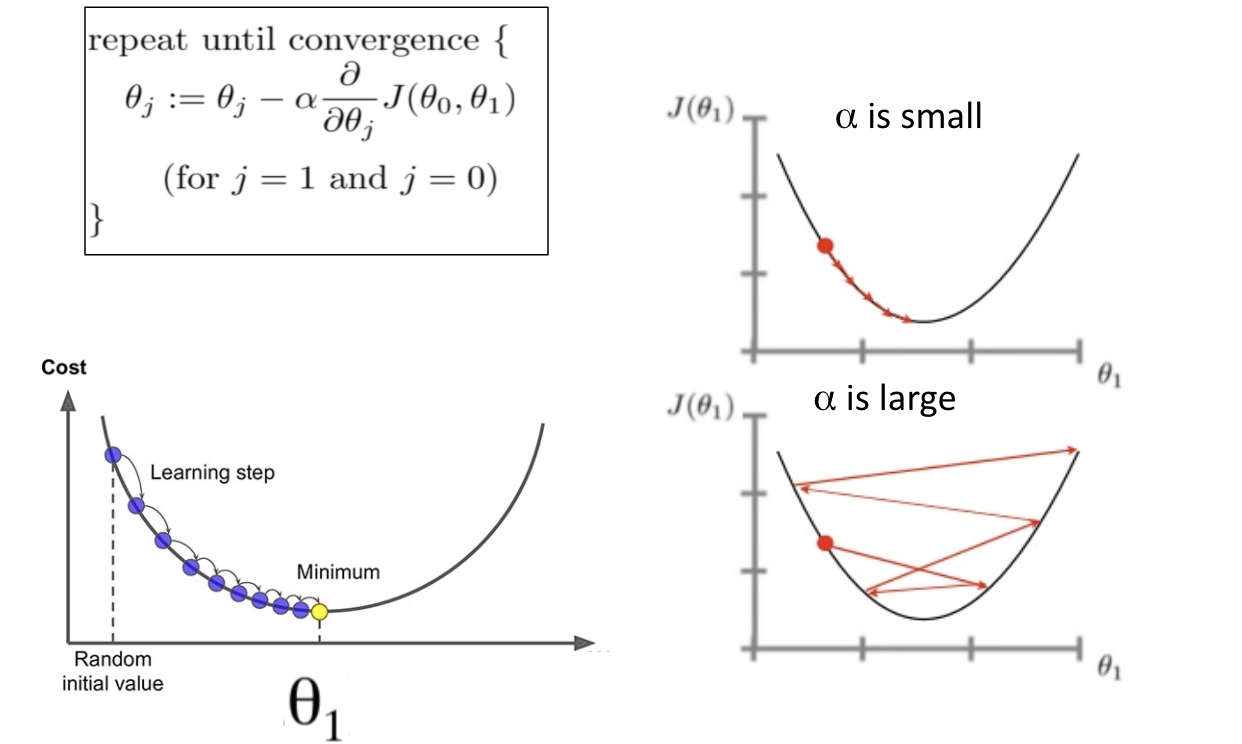

# Lr is a paramter of the optimizer that we select.

In [ ]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['acc'])

# The optimizer uses default parameters.
tf.keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    name="Adam",
    **kwargs
)

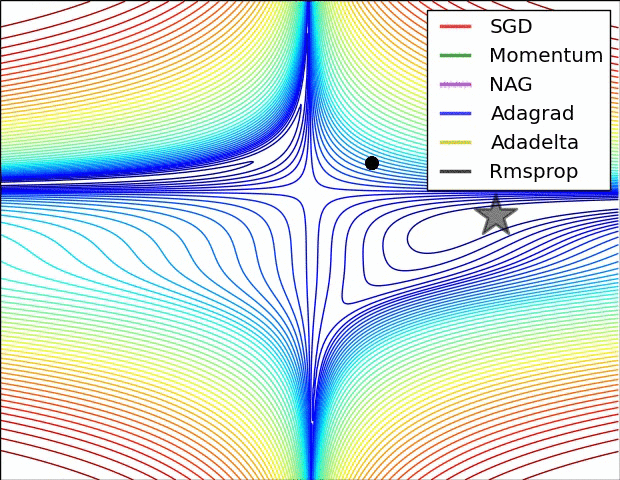

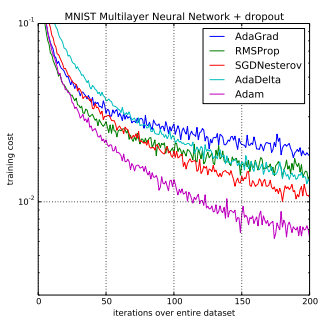

In [ ]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001, beta_1 =0.9, beta_2=0.999, amsgrad = False)

In [ ]:
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
history_1 = model.fit(train_padded,train_labels, epochs = 10, batch_size = 16,validation_data = (val_padding,val_labels))